In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/asthma/

In [3]:
!cp /content/drive/MyDrive/processed-data.csv /content/asthma/

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/asthma/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/asthma/processed-data.csv


In [5]:
df=pd.read_csv('/content/asthma/processed-data.csv')

In [6]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression

In [8]:
df.shape

(316800, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [10]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [11]:
target = 'Difficulty-in-Breathing'
X = df.drop(target , axis= 1)
y= df[target]

In [12]:
X

,Tiredness,Dry-Cough,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [13]:
y

0         1
1         1
2         1
3         1
4         1
         ..
316795    0
316796    0
316797    0
316798    0
316799    0
Name: Difficulty-in-Breathing, Length: 316800, dtype: int64

In [14]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1 , 1))

In [15]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (316800, 18)
The shape of y is (316800, 1)


In [16]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)

print(f'the shape of X train is {X_train.shape}')
print(f'the shape of y train is {y_train.shape}')
print(f'the shape of X test is {X_test.shape}')
print(f'the shape of y test is {y_test.shape}')

the shape of X train is (253440, 18)
the shape of y train is (253440, 1)
the shape of X test is (63360, 18)
the shape of y test is (63360, 1)


In [17]:
from sklearn.metrics import mean_absolute_error
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)

In [73]:
del model
del history

NameError: ignored

In [74]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=18))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'acc', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                608       
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history = model.fit(X_train , y_train , epochs=20 , validation_split=0.2)

Epoch 1/20
6336/6336 [==============================] - 30s 4ms/step - loss: 0.1613 - mean_absolute_error: 0.3306 - acc: 0.6849 - f1_m: 0.6742 - precision_m: 0.6928 - recall_m: 0.6886 - val_loss: 0.1581 - val_mean_absolute_error: 0.3209 - val_acc: 0.6842 - val_f1_m: 0.7134 - val_precision_m: 0.6464 - val_recall_m: 0.8113
Epoch 2/20
6336/6336 [==============================] - 26s 4ms/step - loss: 0.1569 - mean_absolute_error: 0.3198 - acc: 0.6876 - f1_m: 0.6649 - precision_m: 0.7249 - recall_m: 0.6705 - val_loss: 0.1582 - val_mean_absolute_error: 0.3195 - val_acc: 0.6839 - val_f1_m: 0.7293 - val_precision_m: 0.6316 - val_recall_m: 0.8781
Epoch 3/20
6336/6336 [==============================] - 28s 4ms/step - loss: 0.1565 - mean_absolute_error: 0.3163 - acc: 0.6878 - f1_m: 0.6640 - precision_m: 0.7408 - recall_m: 0.6878 - val_loss: 0.1578 - val_mean_absolute_error: 0.3180 - val_acc: 0.6875 - val_f1_m: 0.5347 - val_precision_m: 0.9920 - val_recall_m: 0.3773
Epoch 4/20
6336/6336 [=========

In [51]:
loss, mae, acc, f1, precision, recall = model.evaluate(X_test, y_test, verbose=1)

1980/1980 [==============================] - 5s 3ms/step - loss: 0.1560 - mean_absolute_error: 0.3127 - acc: 0.6890 - f1_m: 0.7580 - precision_m: 0.6167 - recall_m: 0.9982


In [52]:
model.save('model.keras')

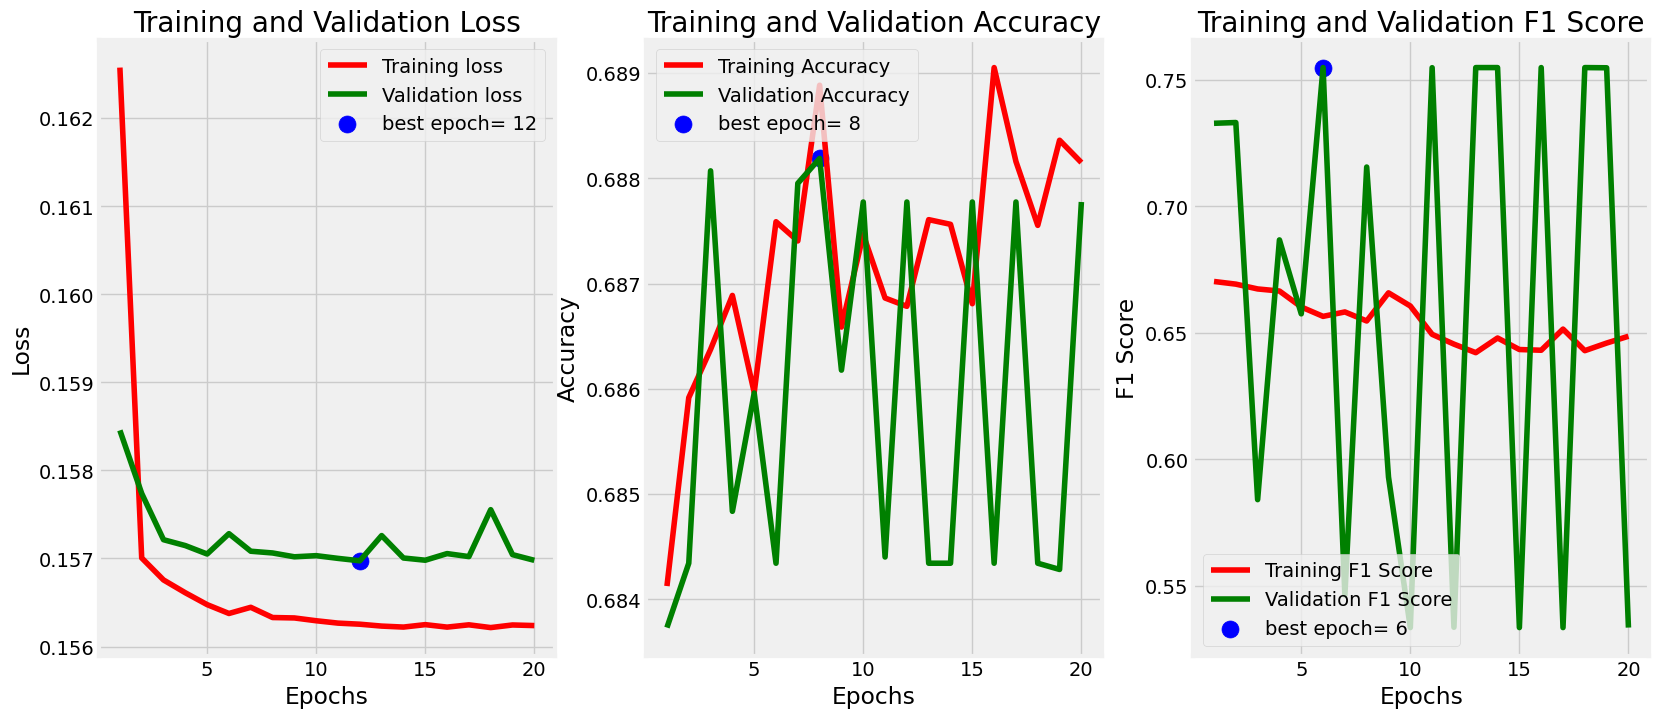

In [ ]:
tr_acc = history.history['acc']
tr_loss = history.history['loss']
f1_score = history.history['f1_m']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
val_f1_score = history.history['val_f1_m']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
index_f1_score = np.argmax(val_f1_score)
acc_highest = val_acc[index_acc]
f1_highest = val_f1_score[index_f1_score]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
f1_score_label = f'best epoch= {str(index_f1_score + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(Epochs, f1_score, 'r', label= 'Training F1 Score')
plt.plot(Epochs, val_f1_score, 'g', label= 'Validation F1 Score')
plt.scatter(index_f1_score + 1 , f1_highest, s= 150, c= 'blue', label= f1_score_label)
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
X_test[0].shape, y_test[0]
X_test.shape, y_test.shape

((63360, 18), (63360, 1))

In [ ]:
X_test

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [ ]:
X_test[0], y_test[0]

(array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0.]),
 array([1.]))

In [ ]:
y_pred = model.predict(np.array([X_test[0]]))
y_pred

1/1 [==============================] - 0s 95ms/step


array([[0.9972148]], dtype=float32)